In [168]:
import numpy as np
import random
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## data aggregation

In [169]:
df = pd.DataFrame(np.random.randn(30, 4),
      index = pd.date_range('1/12/2020', periods=30),
      columns = ['A', 'B', 'C', 'D'])

df.head()

,A,B,C,D
2020-01-12,0.406941,-1.221201,-0.071997,-1.100212
2020-01-13,-0.467961,2.229176,-0.480912,-1.140054
2020-01-14,1.487103,-0.443994,1.405901,0.290424
2020-01-15,0.283066,0.634343,-0.219961,-0.309138
2020-01-16,-1.400546,0.182405,-0.451744,1.626180


!['img'](rolling.png)

In [170]:
r = df.rolling(window=3,min_periods=1)
r

Rolling [window=3,min_periods=1,center=False,axis=0]

In [172]:
r.aggregate(np.sum)[:12]

,A,B,C,D
2020-01-12,0.406941,-1.221201,-0.071997,-1.100212
2020-01-13,-0.061020,1.007976,-0.552909,-2.240266
2020-01-14,1.426082,0.563981,0.852992,-1.949842
2020-01-15,1.302207,2.419525,0.705028,-1.158768
2020-01-16,0.369622,0.372753,0.734196,1.607466
2020-01-17,-3.976526,1.398116,-0.540978,0.333973
2020-01-18,-3.591910,-1.002082,-1.287058,-0.695239
2020-01-19,-3.167628,-0.443328,-1.126644,-2.290698
2020-01-20,0.493573,-0.506375,0.450503,-1.410568
2020-01-21,-0.629291,1.017215,2.512034,-0.392500


In [173]:
r['A'].aggregate(np.sum)[:9]

2020-01-12    0.406941
2020-01-13   -0.061020
2020-01-14    1.426082
2020-01-15    1.302207
2020-01-16    0.369622
2020-01-17   -3.976526
2020-01-18   -3.591910
2020-01-19   -3.167628
2020-01-20    0.493573
Freq: D, Name: A, dtype: float64

In [174]:
r[['A','B']].aggregate(np.mean)[:4]

,A,B
2020-01-12,0.406941,-1.221201
2020-01-13,-0.030510,0.503988
2020-01-14,0.475361,0.187994
2020-01-15,0.434069,0.806508


In [175]:
df['big'] = 0
df.loc[df['A'] > 0.9, 'big'] = 1 #set some 'big' numbers class

In [181]:
df.loc[:, df.columns != 'A'].groupby('big').aggregate(sum)

,B,C,D
big,,,
0,-3.964262,-1.041505,-5.88792
1,1.349446,-0.609818,1.52784


In [183]:
df.loc[:, df.columns != 'A'].groupby('big').count()

,B,C,D
big,,,
0,26,26,26
1,4,4,4


# Let's try to cluster our datasets.
## Clustering is an unsupervised problem of finding natural groups in the feature space of input data.

In [184]:
#need to change the index first
df = df.reset_index()
df.head()

,index,A,B,C,D,big
0,2020-01-12,0.406941,-1.221201,-0.071997,-1.100212,0
1,2020-01-13,-0.467961,2.229176,-0.480912,-1.140054,0
2,2020-01-14,1.487103,-0.443994,1.405901,0.290424,1
3,2020-01-15,0.283066,0.634343,-0.219961,-0.309138,0
4,2020-01-16,-1.400546,0.182405,-0.451744,1.626180,0


In [185]:
df.iloc[:4,1:-1] #slice df, select all but the first and the last column

,A,B,C,D
0,0.406941,-1.221201,-0.071997,-1.100212
1,-0.467961,2.229176,-0.480912,-1.140054
2,1.487103,-0.443994,1.405901,0.290424
3,0.283066,0.634343,-0.219961,-0.309138


## PCA

In [186]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [187]:
x = StandardScaler().fit_transform(df.iloc[:,1:-1])

In [188]:
x[:4]

array([[ 0.47568265, -1.0955896 , -0.01626021, -1.00997007],
       [-0.40383547,  2.23779931, -0.40847955, -1.05211073],
       [ 1.56154195, -0.34473493,  1.40129312,  0.46090249],
       [ 0.35115365,  0.69704007, -0.15818289, -0.17325335]])

In [196]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3'])

In [197]:
pca.explained_variance_ratio_

array([0.35252587, 0.2847496 , 0.20499618])

In [198]:
finalDf = pd.concat([principalDf, df], axis = 1)

In [199]:
finalDf.head()

,PC1,PC2,PC3,index,A,B,C,D,big
0,-1.053776,-0.640056,-0.005428,2020-01-12,0.406941,-1.221201,-0.071997,-1.100212,0
1,0.564490,1.893796,-1.576526,2020-01-13,-0.467961,2.229176,-0.480912,-1.140054,0
2,-0.859005,-1.429682,-0.647552,2020-01-14,1.487103,-0.443994,1.405901,0.290424,1
3,0.279416,0.178002,-0.744459,2020-01-15,0.283066,0.634343,-0.219961,-0.309138,0
4,1.526960,0.502889,1.456034,2020-01-16,-1.400546,0.182405,-0.451744,1.626180,0


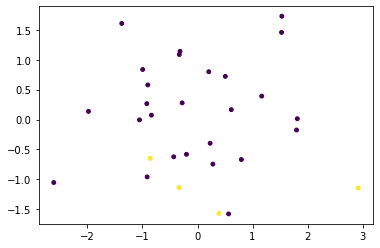

In [201]:
plt.scatter(finalDf['PC1'], finalDf['PC3'], c = finalDf['big'], s = 15)

## Isomap Embedding

!['iso'](isomap.png)

### In A we see that two points that are close together in Euclidean Space in this “Swiss roll” dataset may not reflect the intrinsic similarity between these two points.

### In B a graph is constructed with each point as n nearest neighbours (K=7 here). The shortest geodesic distance is then calculated by a path finding algorithm such as Djikstra’s Shortest Path.

### In C, this is the 2D graph is recovered from applying classical MDS (Multidimensional scaling) to the matrix of graph distances. A straight line has been applied to represent a simpler and cleaner approximation to the true geodesic path shown in A.

In [202]:
from sklearn.manifold import Isomap

In [214]:
df.iloc[:5,1:-3] #try[:,1:-3] for C1

,A,B
0,0.406941,-1.221201
1,-0.467961,2.229176
2,1.487103,-0.443994
3,0.283066,0.634343
4,-1.400546,0.182405


In [215]:
iso = Isomap(n_neighbors=6, n_components=2)
iso.fit(df.iloc[:,1:-3])#try [:,1:-3]
manifold_2Da = iso.transform(df.iloc[:,1:-3]) #try [:,1:-3]
manifold_2D = pd.DataFrame(manifold_2Da, columns=['C1', 'C2'])

Iso_Df = pd.concat([manifold_2D, df], axis = 1)
Iso_Df.head()

,C1,C2,index,A,B,C,D,big
0,-1.231954,-0.244846,2020-01-12,0.406941,-1.221201,-0.071997,-1.100212,0
1,2.087730,0.729022,2020-01-13,-0.467961,2.229176,-0.480912,-1.140054,0
2,-1.048739,1.118481,2020-01-14,1.487103,-0.443994,1.405901,0.290424,1
3,0.397012,0.743782,2020-01-15,0.283066,0.634343,-0.219961,-0.309138,0
4,1.044351,-1.146501,2020-01-16,-1.400546,0.182405,-0.451744,1.626180,0


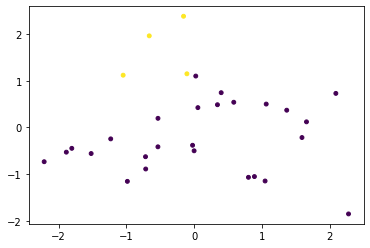

In [216]:
plt.scatter(Iso_Df['C1'], Iso_Df['C2'], c = Iso_Df['big'], s = 15)